# Visual Comparison of Bot Drawdown Behavior

This is an interactive Jupyter notebook. By clicking in a cell and hitting SHIFT-ENTER, the cell is processed. To process all cells initially, first hit this icon in the toolbar:

![Run all cells](run-all-cells.png)

In the dialog, confirm to restart the kernel. Then go down to the **Bot list**. Edit the bot settings and continue with SHIFT-ENTER to update the plot after you have changed the bot settings.

In [5]:
# normalized prize
base_prize = 100

## Function to calculate all steps for a bot

In [2]:
def bot_steps(bo, so , sos, os, ss, mstc):
    steps = []
    steps.append({ "deviation": 0, "size": bo, "prize": base_prize, "quantity": bo/base_prize })
    for i in range(1, mstc+1):
        deviation = steps[i-1]["deviation"] + sos * pow(ss, i-1)
        size_inc = so * pow(os, i-1)
        size = steps[i-1]["size"] + size_inc
        prize = base_prize * (1-deviation/100)
        
        quantity_inc = size_inc/prize
        quantity = steps[i-1]["quantity"] + quantity_inc
        steps.append({ "deviation": deviation, "size": size, "quantity": quantity })
    return steps

## Function to calculate average prize in relation to deviation

In [3]:
def deviation_avg_prize(steps):
    avg_prize = [ base_prize ]
    deviation = [ steps[0]["size"]/base_prize ]
    for step in steps:
        avg_prize.append(step["size"]/step["quantity"])
        deviation.append(step["deviation"])
    
    return deviation, avg_prize

## Bot list and plotting

**In the cell below, enter the bot settings to be plotted.**

Every bot is defined as *[BO, SO, SOS, OS, SS, MSTC, Label]*. Bots are elements of a list. Double click the cell below, edit the list, add or remove definitions as needed, and hit SHIFT-ENTER to create the plot.

Text(0.5, 1.0, 'Comparison of drawdown behavior')

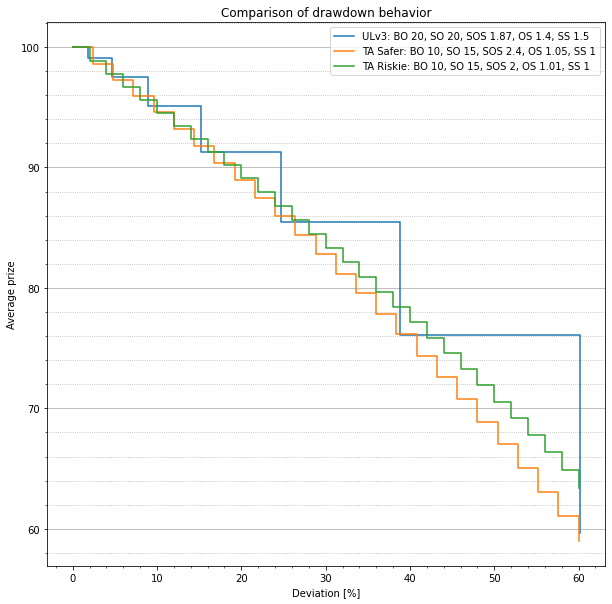

In [4]:
bots = \
[
    [20, 20, 1.87, 1.4, 1.5, 7, "ULv3: BO 20, SO 20, SOS 1.87, OS 1.4, SS 1.5"],
    [10, 15, 2.4, 1.05, 1, 25, "TA Safer: BO 10, SO 15, SOS 2.4, OS 1.05, SS 1"],
    [10, 15, 2, 1.01, 1, 30, "TA Riskier: BO 10, SO 15, SOS 2, OS 1.01, SS 1"],
]

# (Almost) no need for changes below this line

import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 1, figsize=(10, 10))  # figsize is the size of the plot created, change if needed
for bot in bots:
    deviation, avg_prize = deviation_avg_prize(bot_steps(bot[0],bot[1],bot[2],bot[3],bot[4],bot[5]))
    axs.step(deviation, avg_prize, where="post", label=bot[6])
axs.legend()
plt.minorticks_on()
plt.grid(axis='y', which="major")
plt.grid(axis='y', which="minor", linestyle=":")
plt.xlabel("Deviation [%]")
plt.ylabel("Average prize")
plt.title("Comparison of drawdown behavior")